## Importing the Libraries

In [1]:
import pandas as pd
import naive_bayes
import numpy as np
from create_dataset import TextDataset, WordDataset
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

## Creating Dataset from Text Files

In [2]:
rootFolder = './twenty_newsgroups/mini_newsgroups'
textObj = TextDataset(rootFolder)
textObj.create_Text_Dataset()

In [3]:
newsDataset = pd.read_csv('News_Data.csv')
newsDataset.head(5)

,File Content,Category
0,Xref: cantaloupe.srv.cs.cmu.edu soc.religion.c...,soc.religion.christian
1,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,soc.religion.christian
2,Newsgroups: soc.religion.christian\nPath: cant...,soc.religion.christian
3,Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...,soc.religion.christian
4,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,soc.religion.christian


## Splitting the Dataset into Training and Test

In [4]:
fileContent_Train, fileContent_Test, category_Train, category_Test = train_test_split(newsDataset['File Content'], 
                                                                                          newsDataset['Category'])

## Create Word Dataset From Train Dataset

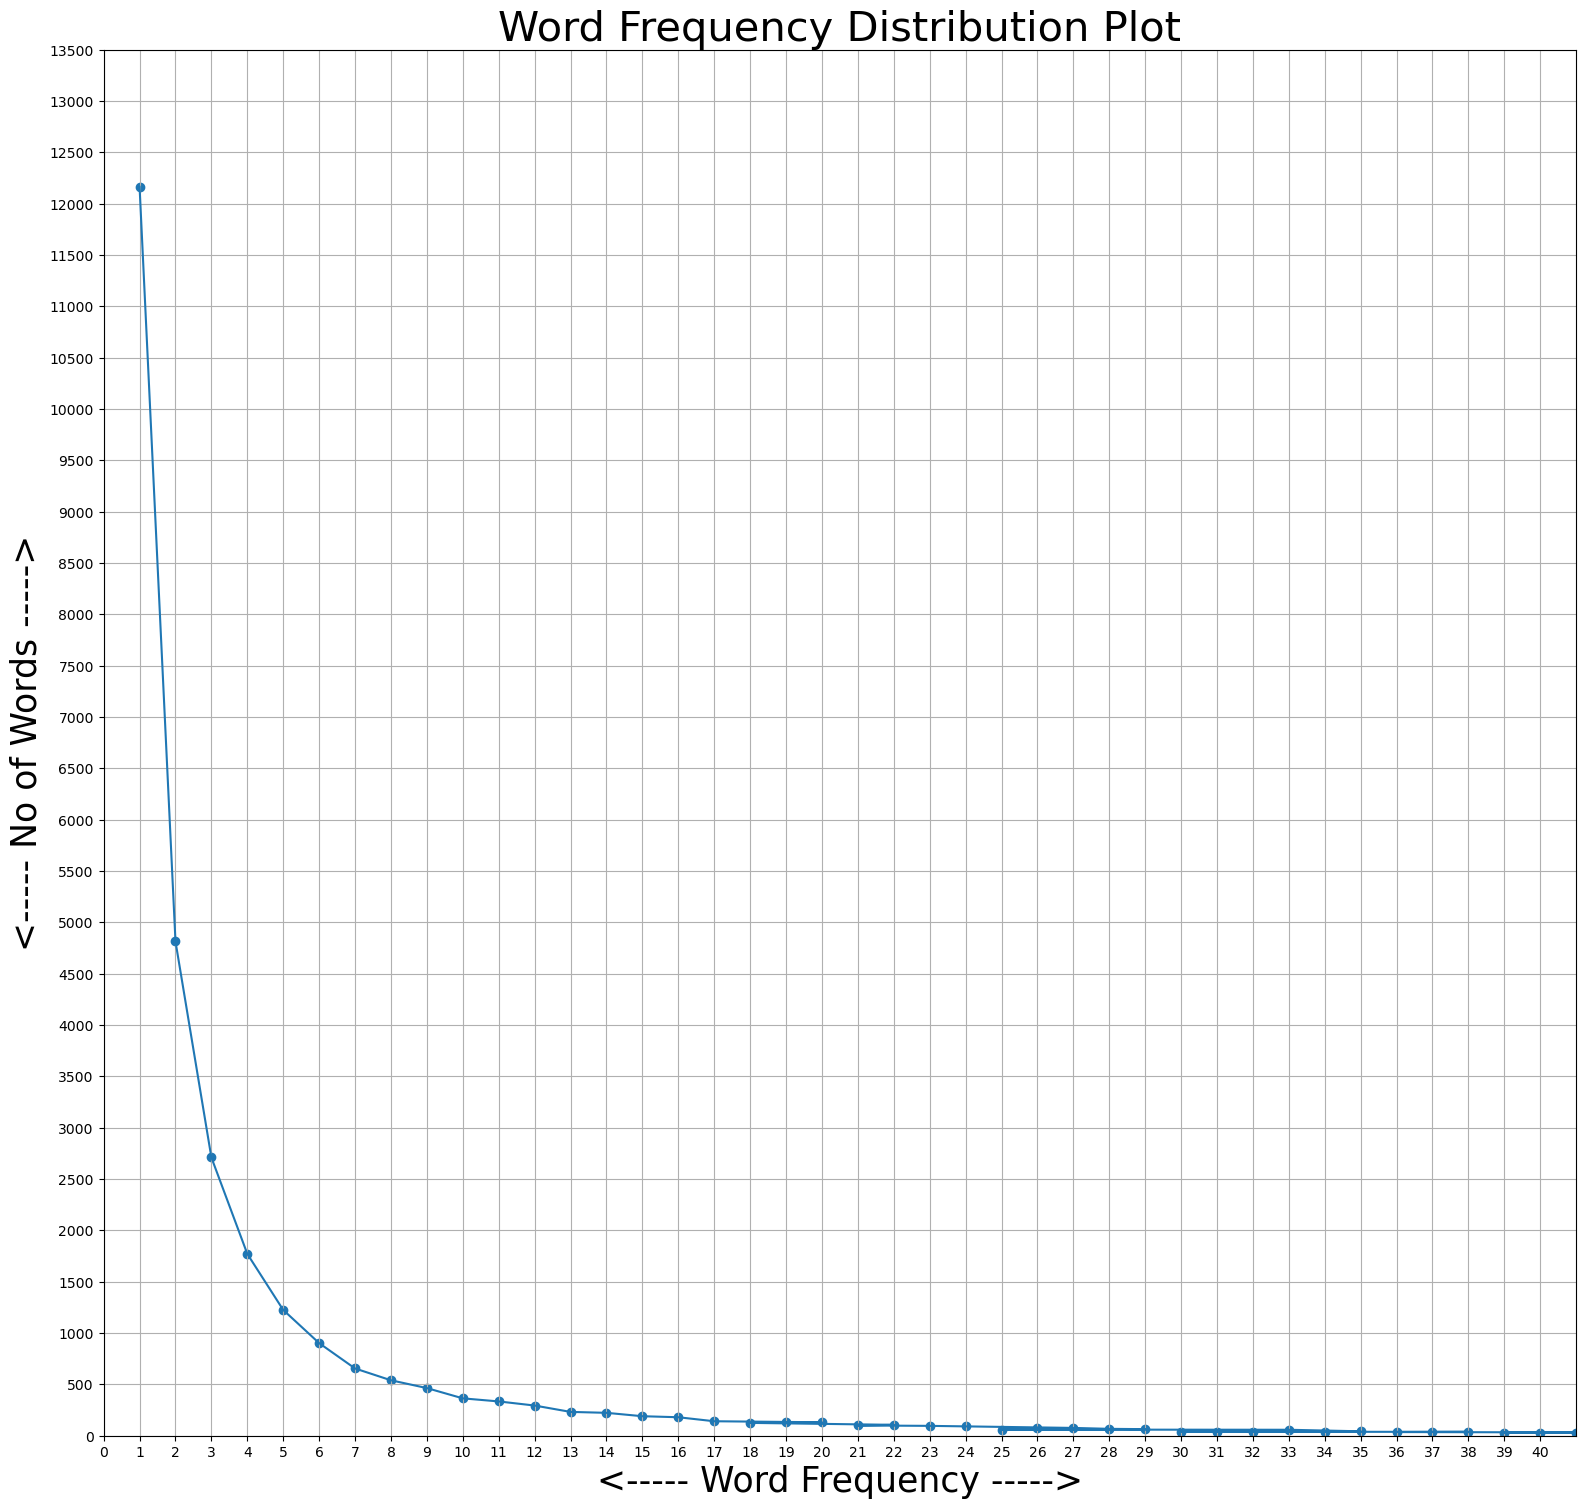

Enter k for which words having frequency at least k: 100
Total No of Words as Feature:  332
Words as Feature:  ['xref', 'cantaloupe', 'srv', 'cmu', 'talk', 'religion', 'misc', 'politics', 'guns', 'soc', 'culture', 'jewish', 'newsgroups', 'path', 'rochester', 'udel', 'bogus', 'sura', 'net', 'howland', 'reston', 'ans', 'agate', 'org', 'subject', 'message', 'sender', 'news', 'service', 'nntp', 'posting', 'host', 'organization', 'references', 'usenet', 'ins', 'cwru', 'netcom', 'tue', 'apr', 'gmt', 'lines', 'article', 'michael', 'writes', 'faith', 'lot', 'point', 'church', 'day', 'clinton', 'mail', 'public', 'das', 'harvard', 'uunet', 'comp', 'graphics', 'distribution', 'interested', 'image', 'windows', 'high', 'game', 'video', 'technology', 'kind', 'uucp', 'noc', 'sys', 'mac', 'hardware', 'thu', 'apple', 'card', 'black', 'white', 'problems', 'board', 'problem', 'time', 'start', 'magnesium', 'club', 'sei', 'cis', 'ohio', 'state', 'zaphod', 'mps', 'usc', 'sdd', 'hp', 'mark', 'sci', 'med', 'p

,xref,cantaloupe,srv,cmu,talk,religion,misc,politics,guns,soc,...,jpl,copy,health,programs,format,turkish,mouse,jpeg,stephanopoulos,Category
0,0,2,2,2,4,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,talk.religion.misc
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,comp.graphics
2,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,comp.sys.mac.hardware
3,0,1,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sci.med
4,0,1,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,comp.sys.ibm.pc.hardware


In [5]:
wordObj = WordDataset()
trainingData = wordObj.fit(fileContent_Train, category_Train)
trainingData.head(5)

In [6]:
testingData = wordObj.create_Dataset(fileContent_Test, category_Test)
testingData.head(5)

,xref,cantaloupe,srv,cmu,talk,religion,misc,politics,guns,soc,...,jpl,copy,health,programs,format,turkish,mouse,jpeg,stephanopoulos,Category
0,0,1,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,comp.sys.ibm.pc.hardware
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,rec.sport.baseball
2,0,1,2,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,rec.sport.hockey
3,0,2,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sci.crypt
4,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sci.electronics


## Splitting the Training Data into Features and Output

In [7]:
x_train = np.array(trainingData.iloc[:,:-1])
y_train = np.array(trainingData.iloc[:,-1])

## Training Inbuild Classifer with Training Data

In [8]:
clf_Inbuild = MultinomialNB()
clf_Inbuild.fit(x_train, y_train)

MultinomialNB()

## Training Self Made Classifier with Training Data

In [9]:
clf_SelfMade = naive_bayes.MultinomialNB()
clf_SelfMade.fit(x_train, y_train)

## Testing Score with Training Data

In [10]:
print('Score with Training Data using Inbuild Classifier: ', clf_Inbuild.score(x_train, y_train))

Score with Training Data using Inbuild Classifier:  0.904


In [11]:
print('Score with Training Data using Self Made Classifier: ', clf_SelfMade.score(x_train, y_train))

Score with Training Data using Self Made Classifier:  0.9766666666666667


## Testing Score with Testing Data

In [12]:
x_test = np.array(testingData.iloc[:,:-1])
y_test = np.array(testingData.iloc[:,-1])

In [13]:
print('Score with Testing Data using Inbuild Classifier: ', clf_Inbuild.score(x_test, y_test))

Score with Testing Data using Inbuild Classifier:  0.79


In [14]:
print('Score with Testing Data using Self Made Classifier: ', clf_SelfMade.score(x_test, y_test))

Score with Testing Data using Self Made Classifier:  0.884
